In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
day3_pixel_size = [25, 25.18, 23.6, 23.9, 26.93, 26.48, 24.33, 22.67, 23.77, 25.5]

day3_mean = np.mean(day3_pixel_size)

day4_pixel_size = [33.62, 34.75, 35.35, 44.62, 41.3, 41.35, 38.42, 39.7, 35.8, 34.78, 35.74]

day4_mean = np.mean(day4_pixel_size)

In [3]:
# want to iterate over every csv file for one condition and find the average distance per frame for each csv file 
# normalise distance in size of body, rather than cm 

average_distances_day3 = []
frame_id_day3 = []

directory_path_day3 = '/Volumes/lab-windingm/home/users/cochral/AttractionRig/Videos/N Free Roaming Larvae/SLEAP-CSV/agarose-day3-n10'

# have to use such to iterate over all the files
for file in os.listdir(directory_path_day3):

    if file.endswith('csv'): # only csv files

        file_path = os.path.join(directory_path_day3, file)

        df = pd.read_csv(file_path)

        for frame in df['frame_idx'].unique():
            
            unique_frame = df[df['frame_idx'] == frame] # filter to ensure the frame is unique 
    
            # cdist function requires two 2-dimensional array-like objects as inputs
            # create an array of the coordinates for that specific frame

            body_coordinates = unique_frame[['body.x', 'body.y']].to_numpy()

            # The cdist function computes the distance between every pair of points in the two arrays passed to it.

            distance = cdist(body_coordinates, body_coordinates, 'euclidean')

            # the cdist function will also calculate the distance between the same tracks e.g. track 1 to track 1 
            # there will be 0s which should be exluded 
            # dont want to just ignore the 0s incase an animal is on top of one another 
            # the cdist function calculates the distances between tracks in a matrix fashion 
            # so can ignore the diagonal values which would refer distance between identical tracks 

            np.fill_diagonal(distance, np.nan)

            average_distance = np.nanmean(distance)

            average_pixel_size_day3 = day3_mean # want to normalise by size so i think simply divide all the distances by body size

            average_distance = average_distance / average_pixel_size_day3 # divide 

            # store frame id and average distance values in two lists 
            # if used a dictionary as before appending the same frame from a new file overides the previous value

            frame_id_day3.append(frame) 
            average_distances_day3.append(average_distance)


        else:
            continue 


df_average_distances_day3 = pd.DataFrame({
    'frame': frame_id_day3,
    'average_distance': average_distances_day3})


# sort the frame column in ascending values 
df_average_distances_day3 = df_average_distances_day3.sort_values(by='frame', ascending=True)

df_average_distances_day3

,frame,average_distance
0,0,2.045179
599,0,11.911943
600,1,12.030396
1,1,2.120751
2,2,2.393846
...,...,...
595,595,16.348795
1195,596,21.800592
596,596,16.370225
597,597,16.415581


In [4]:
# want to iterate over every csv file for one condition and find the average distance per frame for each csv file 
# normalise distance in size of body, rather than cm 

average_distances_day4 = []
frame_id_day4 = []

directory_path_day4 = '/Volumes/lab-windingm/home/users/cochral/AttractionRig/Videos/N Free Roaming Larvae/SLEAP-CSV/agarose-day4-n10'

# have to use such to iterate over all the files
for file in os.listdir(directory_path_day4):

    if file.endswith('csv'): # only csv files

        file_path = os.path.join(directory_path_day4, file)

        df = pd.read_csv(file_path)

        for frame in df['frame_idx'].unique():
            
            unique_frame = df[df['frame_idx'] == frame] # filter to ensure the frame is unique 
    
            # cdist function requires two 2-dimensional array-like objects as inputs
            # create an array of the coordinates for that specific frame

            body_coordinates = unique_frame[['body.x', 'body.y']].to_numpy()

            # The cdist function computes the distance between every pair of points in the two arrays passed to it.

            distance = cdist(body_coordinates, body_coordinates, 'euclidean')

            # the cdist function will also calculate the distance between the same tracks e.g. track 1 to track 1 
            # there will be 0s which should be exluded 
            # dont want to just ignore the 0s incase an animal is on top of one another 
            # the cdist function calculates the distances between tracks in a matrix fashion 
            # so can ignore the diagonal values which would refer distance between identical tracks 

            np.fill_diagonal(distance, np.nan)

            average_distance = np.nanmean(distance)

            average_pixel_size_day4 = day4_mean # want to normalise by size so i think simply divide all the distances by body size

            average_distance = average_distance / average_pixel_size_day4

            # store frame id and average distance values in two lists 
            # if used a dictionary as before appending the same frame from a new file overides the previous value

            frame_id_day4.append(frame) 
            average_distances_day4.append(average_distance)


        else:
            continue 


df_average_distances_day4 = pd.DataFrame({
    'frame': frame_id_day4,
    'average_distance': average_distances_day4})


# sort the frame column in ascending values 
df_average_distances_day4 = df_average_distances_day4.sort_values(by='frame', ascending=True)

df_average_distances_day4

,frame,average_distance
0,0,1.993108
3588,0,8.304073
2992,0,2.909758
2393,0,5.147210
599,0,6.318599
...,...,...
1793,598,13.572943
2991,598,17.096181
5381,598,16.648931
4782,598,15.543907


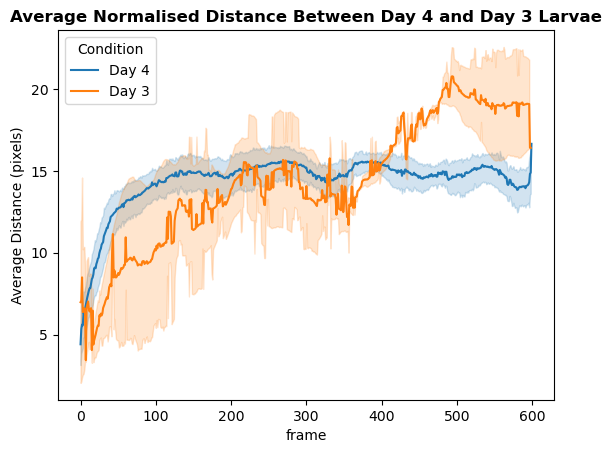

In [5]:
# normalised distance to body size

sns.lineplot(data=df_average_distances_day4, x='frame', y='average_distance', label='Day 4')
sns.lineplot(data=df_average_distances_day3, x='frame', y='average_distance', label='Day 3')
plt.legend(title='Condition')

plt.title('Average Normalised Distance Between Day 4 and Day 3 Larvae', fontweight='bold')  # avwrage animals inbetween 
plt.ylabel('Average Distance (pixels)')
plt.legend(title='Condition')


plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/attraction-rig/Normalised_distance.png', dpi=300, bbox_inches='tight')
plt.show()